<a href="https://colab.research.google.com/github/Amodjha01/LGMVIP-DataScience/blob/main/Neural_Network_Read_Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LGM VIP Task: Develop A Neural Network That Can Read Handwriting**

**Executed by: AMOD KUMAR JHA | amoddss01@gmail.com | amodjha3473@gmail.com**

### **Importing the necessary libraries**

In [4]:
import tensorflow as tf
from numpy import unique, argmax
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np


### **Load Dataset**

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


### **Reshaping the trainning and testing dataset**

In [6]:
x_train =x_train.reshape((x_train.shape[0] ,x_train.shape[1], x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] ,x_test.shape[1], x_test.shape[2],1))

### **Normalize the value of pixels in images**

In [8]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

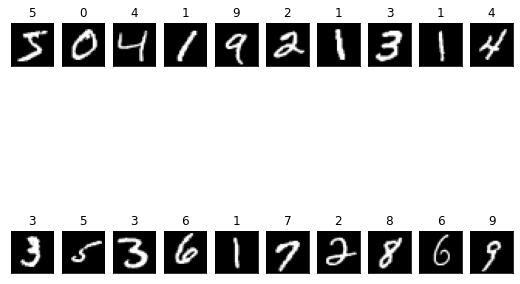

In [27]:
fig=plt.figure(figsize=(9,7))
for i in range(20):
  ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap='gray')
  ax.set_title(y_train[i])

### **Determine the shape of input image**

In [9]:

img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

### **Defining the model**

In [10]:
import tensorflow as tf


model = tf.keras.models.Sequential([

  tf.keras.layers.Flatten(input_shape=(28, 28)),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(10)

])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


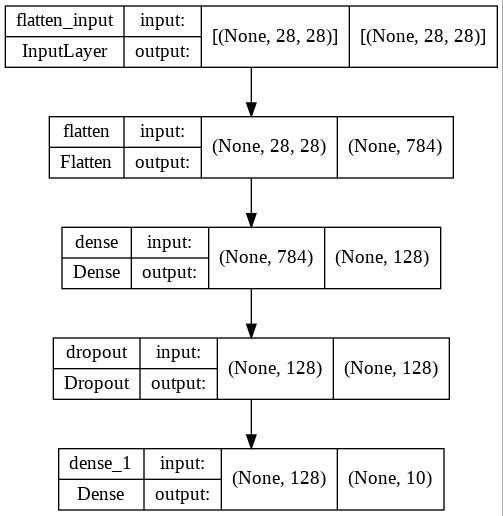

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.jpg', show_shapes=True)

In [13]:
predictions = model(x_train[:1]).numpy()

predictions

array([[-0.5891557 ,  0.45917016,  0.04717601,  0.38901785,  0.40315711,
        -0.29364935, -0.30016065,  0.669032  , -0.58070207, -0.1396645 ]],
      dtype=float32)

In [14]:

tf.nn.softmax(predictions).numpy()

array([[0.05031851, 0.14355223, 0.09507868, 0.13382682, 0.13573247,
        0.06761836, 0.0671795 , 0.17707276, 0.05074569, 0.078875  ]],
      dtype=float32)

### **Compling The Model**

In [15]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn, metrics=['accuracy'])

### **Train the model**

In [16]:

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3019 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1422 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1071 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0867 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0741 - accuracy: 0.9767


### **Model Evaluation**

In [17]:
model.evaluate(x_test,  y_test, verbose=5)

[0.07017704844474792, 0.9787999987602234]

### **Probablity of the model**

In [28]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(x_test[:9])

<tf.Tensor: shape=(9, 10), dtype=float32, numpy=
array([[6.8743773e-08, 1.5546430e-08, 4.5532808e-08, 1.3617065e-04,
        4.4501222e-11, 4.9570014e-07, 2.6513026e-13, 9.9986088e-01,
        5.1360502e-07, 1.8437771e-06],
       [3.0743146e-07, 7.9117177e-05, 9.9989939e-01, 3.7254572e-06,
        8.8939761e-14, 9.1877706e-07, 9.1951388e-06, 3.4514058e-11,
        7.2712619e-06, 1.2019717e-13],
       [1.8648569e-07, 9.9829429e-01, 3.0138172e-04, 3.7139107e-05,
        7.6192220e-05, 7.9842393e-06, 8.3444456e-06, 1.0420202e-03,
        2.3090752e-04, 1.5900824e-06],
       [9.9928731e-01, 5.5221041e-09, 9.0880631e-06, 1.1381633e-06,
        5.3401518e-06, 4.3196676e-05, 6.1927683e-04, 2.0036163e-05,
        1.3927702e-07, 1.4479675e-05],
       [2.7391595e-06, 5.5280978e-11, 5.7947486e-06, 2.3910152e-08,
        9.9924779e-01, 4.7142495e-07, 1.9948118e-06, 7.1865456e-06,
        1.6098465e-06, 7.3252281e-04],
       [3.8812388e-08, 9.9843639e-01, 9.0591247e-06, 6.6988355e-06,
        

### **Testing the model**

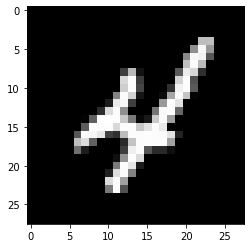

In [29]:

img = x_train[9]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [30]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 4


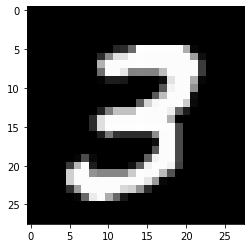

In [32]:
img = x_train[7]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [22]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 2


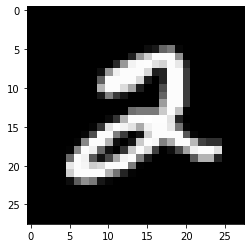

In [33]:
img = x_train[5]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [34]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

predicted : 2
